C:\Users\NDICHU\AppData\Local\Temp\ipykernel_1328\1785566209.py:4: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv.gz")


(1056660, 19)
Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  autho

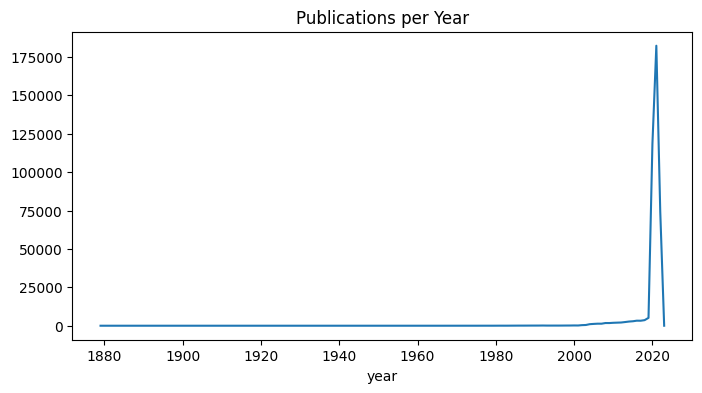

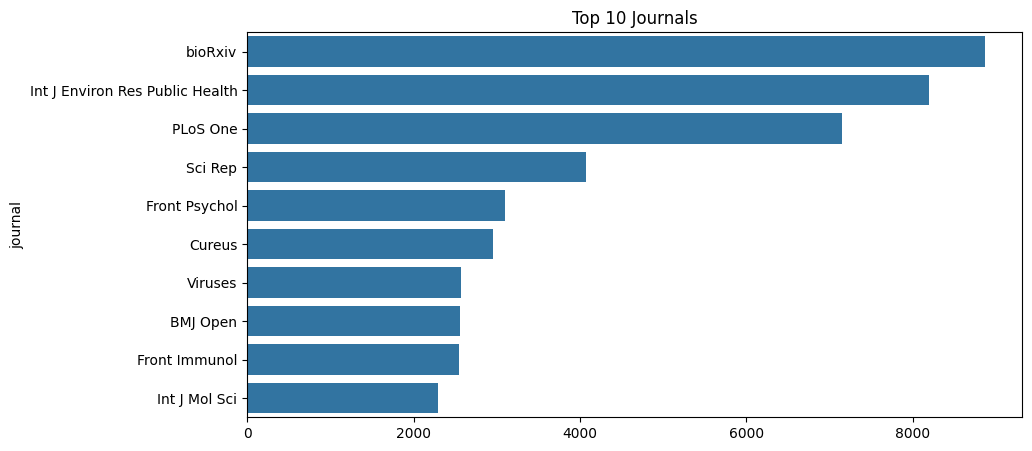

In [6]:
import pandas as pd

# Load metadata
df = pd.read_csv("metadata.csv.gz")

# Inspect structure
print(df.shape)
print(df.columns)
df.head()
df.isnull().sum().head(20)
df.info()
df.describe(include='all').T
df.nunique().head(20)
df.dtypes
df.select_dtypes
df.select_dtypes(include=['object']).nunique().sort_values(ascending=False).head(20)

# Keep only important columns
df = df[['title', 'abstract', 'publish_time', 'authors', 'journal']]

# Drop rows where title or abstract is missing
df = df.dropna(subset=['title', 'abstract'])

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df = df.dropna(subset=['publish_time'])
df['year'] = df['publish_time'].dt.year
df['month'] = df['publish_time'].dt.month
df['year'] = df['publish_time'].dt.year
papers_per_year = df['year'].value_counts().sort_index()
top_journals = df['journal'].value_counts().head(10)
top_authors = df['authors'].value_counts().head(10)
df['abstract_length'] = df['abstract'].apply(len)
df['title_length'] = df['title'].apply(len)
df[['abstract_length', 'title_length']].describe()
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.split()))
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df[['abstract_word_count', 'title_word_count']].describe()
df = df.drop(columns=['abstract_length', 'title_length'])

df.head()
df.to_csv("cleaned_metadata.csv.gz", index=False, compression='gzip')
import matplotlib.pyplot as plt
import seaborn as sns

# Papers per year
plt.figure(figsize=(8,4))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values)
plt.title("Publications per Year")
plt.show()

# Top journals
plt.figure(figsize=(10,5))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top 10 Journals")
plt.show()
